1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


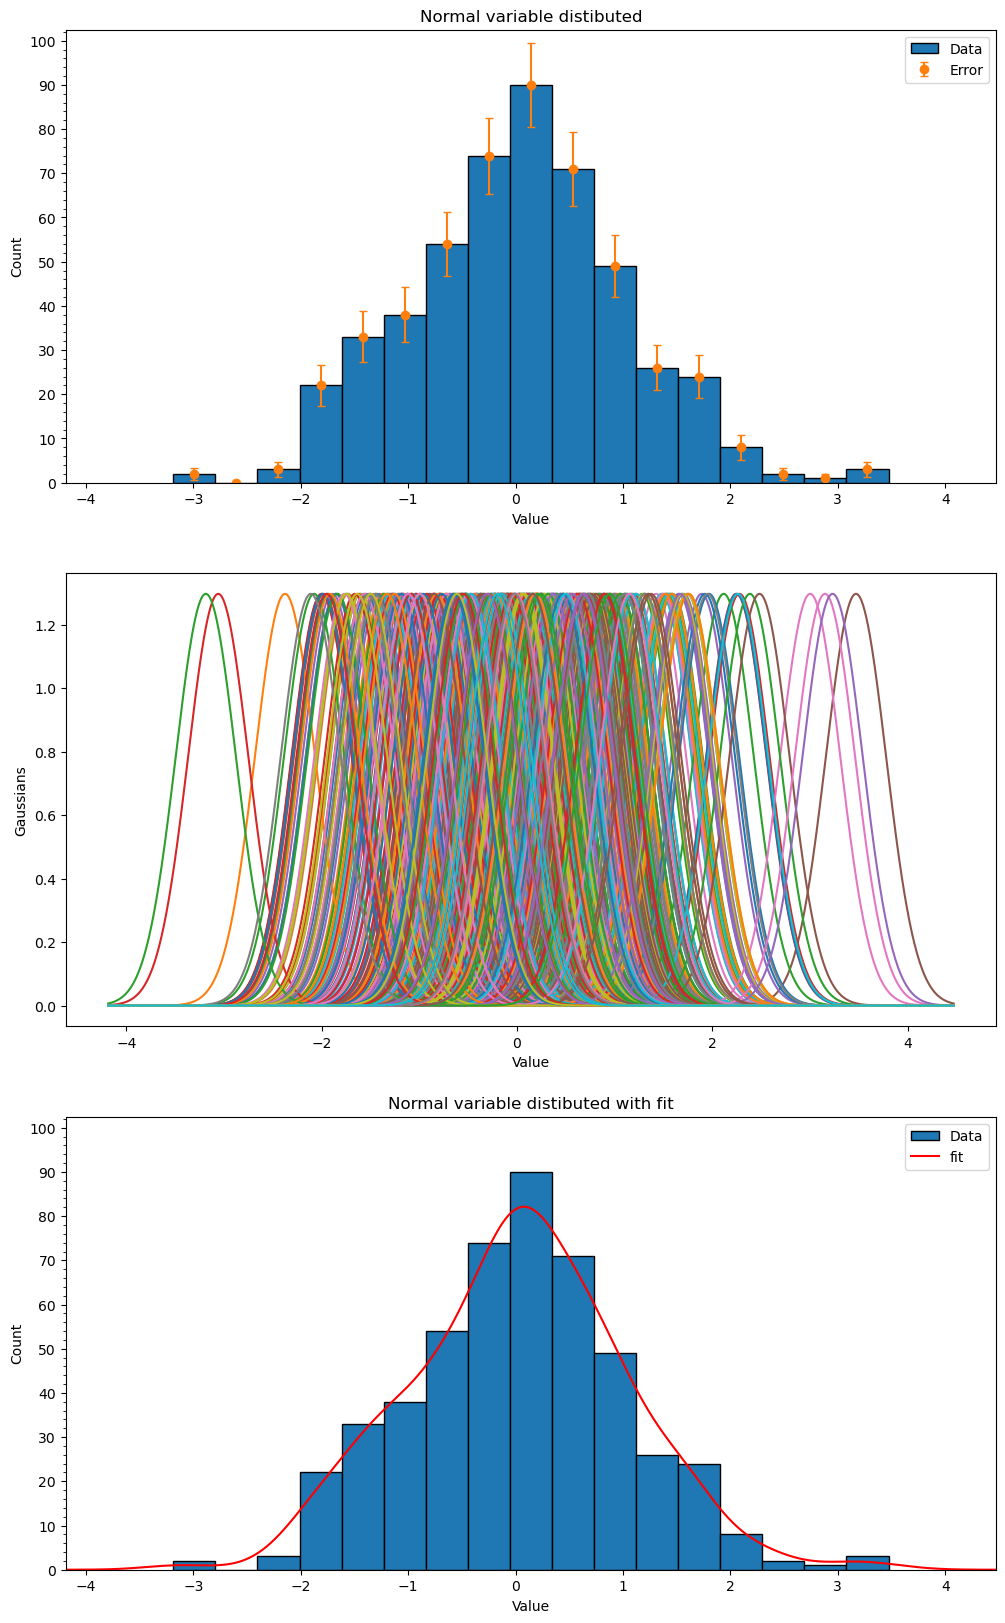

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy as sp
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

mean = 0
sigma = 1
N = 500
x = np.random.normal(mean, sigma, N)

fig1, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,20))

n, bins, _ = ax1.hist(x, bins=17, edgecolor='black', label='Data')


ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.errorbar(0.5*(bins[:-1]+bins[1:]), n, np.sqrt(n), fmt='o', capsize=3, label='Error')
ax1.legend()
ax1.set_title('Normal variable distibuted')
ax1.set_ylim(0, np.max(n)+np.max(np.sqrt(n)+3))
ax1.set_xlim(np.min(x)-sigma, np.max(x)+sigma)

# ax1.xaxis.


ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

lsp = np.linspace(np.min(x)-sigma, np.max(x)+sigma, 1000)
std = 1.06 * x.std() * x.size**(-0.2)
gaussians = np.array([scipy.stats.norm.pdf(lsp, i, std) for i in x])

for p in range(gaussians.shape[0]):
    ax2.plot(lsp, gaussians[p,:])
ax2.set_xlabel('Value')
ax2.set_ylabel('Gaussians')

A_hist = np.sum(n*(bins[1:]-bins[:-1]))
fit = np.sum(gaussians, axis=0)
int_f = sp.integrate.trapz(fit, lsp)

ax3.hist(x, bins=17, edgecolor='black', label='Data')
ax3.set_xlabel('Value')
ax3.set_ylabel('Count')
ax3.plot(lsp, fit/int_f*A_hist, color='red', label='fit')
ax3.legend()
ax3.set_title('Normal variable distibuted with fit')
ax3.set_ylim(0, np.max(n)+np.max(np.sqrt(n)+3))
ax3.set_xlim(np.min(x)-sigma, np.max(x)+sigma)
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-02-03 16:30:49--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-02-03 16:30:49--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uce51f6f225f3855ba28c0c4f0a6.dl.dropboxusercontent.com/cd/0/inline/B1z2xUpN2SinjH8t1Nr1pCb4dNpvRah_rcr_CDF0gOPZQiq2COio6eCqmG7_MGtOxI-rHpe3eJinvnpsULQd9QhhxxnuoVvyVerNApCjy1pkgw3QjK-0YPkK__IUGQPou-fJSXAo8etA9wR7rDlb_129IMnTgG0fWZShAEQfZW59pg/file# [segue]
--2023-02-03 16:30:50--  https://uce51f6f225f3855ba28c0c4f0a6.dl.dropboxusercontent.com/cd/0/i

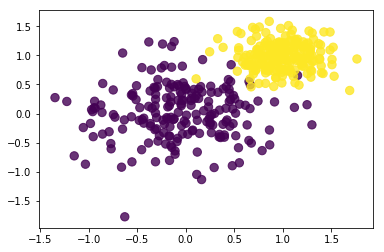

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

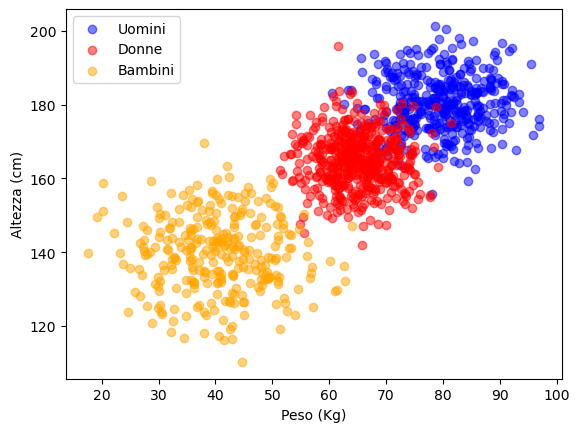

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grafico(x, y, erx, ery, n, label, assx, assy, color):
    plt.xlabel(assx)
    plt.ylabel(assy)
    for i in range(len(x)):
        X = np.random.normal(x[i], erx[i], n[i])
        Y = np.random.normal(y[i], ery[i], n[i])
        plt.scatter(X, Y, label=label[i], color=color[i], alpha=0.5)
    plt.legend()
    plt.show()
    
x = [80, 65, 40]
ex = [7, 5, 8]
y = [180, 165, 140]
ey = [8, 7, 10]
label = ['Uomini', 'Donne', 'Bambini']
assx = 'Peso (Kg)'
assy = 'Altezza (cm)'
c = ['blue', 'red', 'orange']
n = [400, 500, 300]
grafico(x, y, ex, ey, n, label, assx, assy, c)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

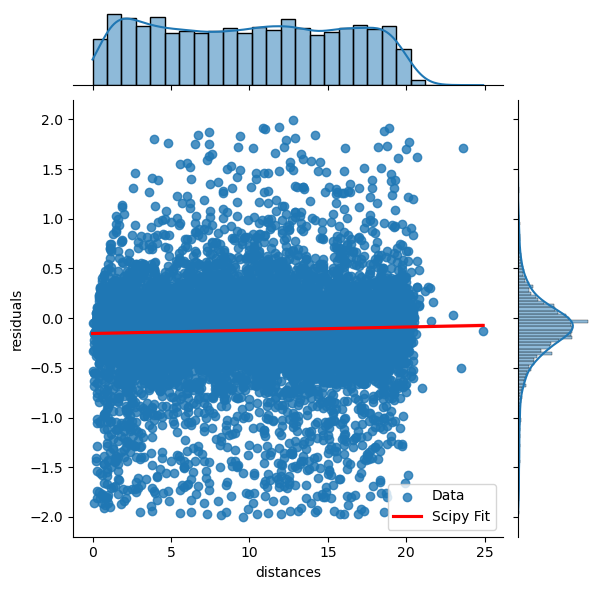

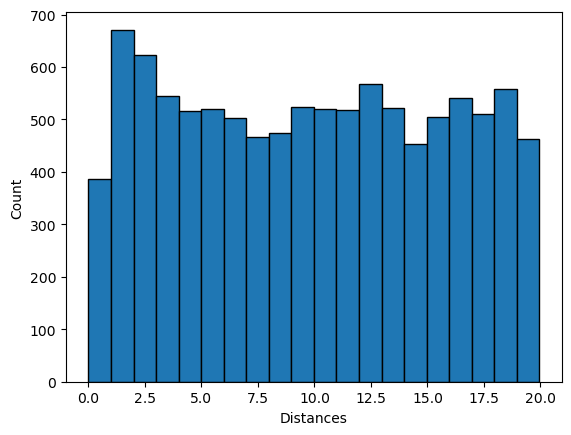

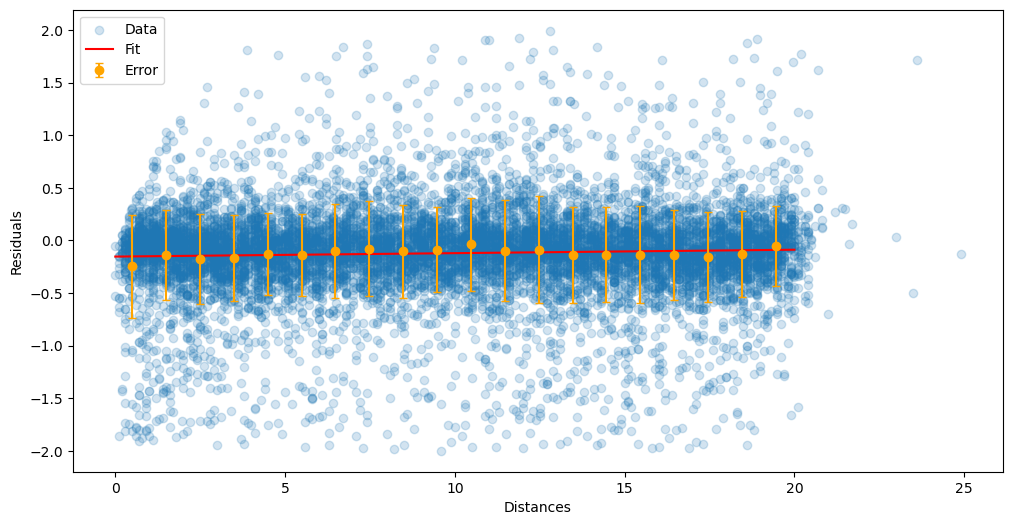

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

d = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
# print(d)

n_d = d[np.abs(d['residuals'])<2]
# print(n_d)

s, i, _, _, _ = ss.linregress(n_d['distances'], n_d['residuals'])

sns.jointplot(data=n_d, x=n_d['distances'], y=n_d['residuals'], kind='reg', label='Data', joint_kws={'line_kws':{'color':'red', 'label':'Scipy Fit'}})
plt.legend()
plt.show()

n, bins, _ = plt.hist(n_d[n_d['distances']<20]['distances'], bins=20, edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Distances')
plt.show()

x = 0.5*(bins[:-1]+bins[1:])
y = np.array([np.mean(n_d[np.logical_and(n_d['distances']>bins[i], n_d['distances']<bins[i+1])]['residuals']) for i in range(bins.shape[0]-1)])
err = np.array([np.std(n_d[np.logical_and(n_d['distances']>bins[i], n_d['distances']<bins[i+1])]['residuals']) for i in range(bins.shape[0]-1)])

lsp = np.linspace(0, 20, 1000)
fit = s*lsp+i

plt.figure(figsize=(12,6))
plt.scatter(n_d['distances'], n_d['residuals'], alpha=0.2, label='Data')
plt.plot(lsp, fit, color='red', label='Fit')
plt.errorbar(x, y, err, fmt='o', capsize=3, color='orange', label='Error')
plt.ylabel('Residuals')
plt.xlabel('Distances')

plt.legend()
plt.show()